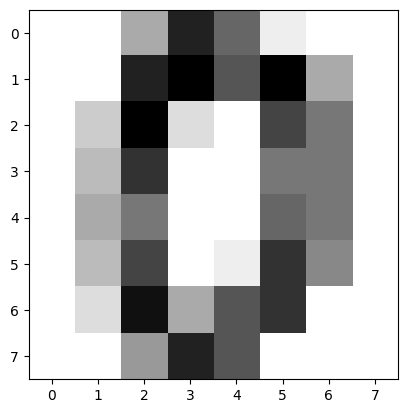

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [3]:
#데이터 평탄화
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [4]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
# x테스트/학습 데이터 나누기

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [7]:
y_pred_knn = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred_knn)
print(scores)

# knn 정확도

0.9527777777777777


[5]


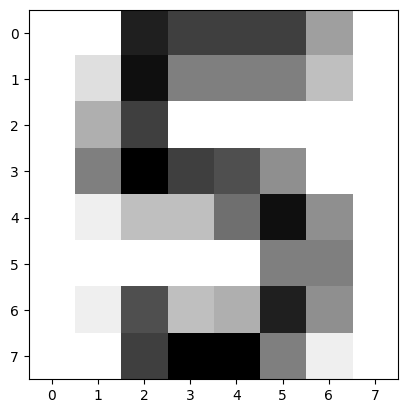

In [8]:
plt.imshow(X_test[10].reshape(8,8), cmap = plt.cm.gray_r, interpolation = 'nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

In [9]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [10]:
y_pred_dt = dt.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred_dt)
print(scores)

# dt 정확도

0.7833333333333333


In [11]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [12]:
#rf 정학도
y_pred_rf = rf.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred_rf)
print(scores)

0.925


In [13]:
#lr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
#lr 정확도
y_pred_lr = lr.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred_lr)
print(scores)

0.9055555555555556




---


**딥러닝**

---



In [15]:
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
#원 핫 인코딩
from sklearn import datasets

digits = datasets.load_digits()
X = data        # (n_samples, 64)
y = digits.target

import pandas as pd

scaler = StandardScaler()
X = scaler.fit_transform(X).astype("float32")
Y = pd.get_dummies(y).to_numpy()

print(Y.shape)
print(X.shape)


(1797, 10)
(1797, 64)


In [17]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

# 다중분류면 softmax
# 이중 분류면 sigmoid

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

# one-hot이면 categorical_crossentropy, 안했으면 sparse_categorical_crossentropy
#reg 이면 mse
#이진분류면 binarical_crossenthropy

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2725 - loss: 2.1252 - val_accuracy: 0.8021 - val_loss: 1.2542
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7545 - loss: 1.1116 - val_accuracy: 0.8993 - val_loss: 0.4917
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8785 - loss: 0.5281 - val_accuracy: 0.9201 - val_loss: 0.2938
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9099 - loss: 0.3378 - val_accuracy: 0.9340 - val_loss: 0.2260
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9319 - loss: 0.2605 - val_accuracy: 0.9375 - val_loss: 0.1844
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9401 - loss: 0.2187 - val_accuracy: 0.9479 - val_loss: 0.1670
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9450 - loss: 0.1929 - val_accuracy: 0.9410 - val_loss: 0.1492
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9552 - loss: 0.1658 - val_accuracy: 0.9549 - val_loss: 0.1367
Epo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


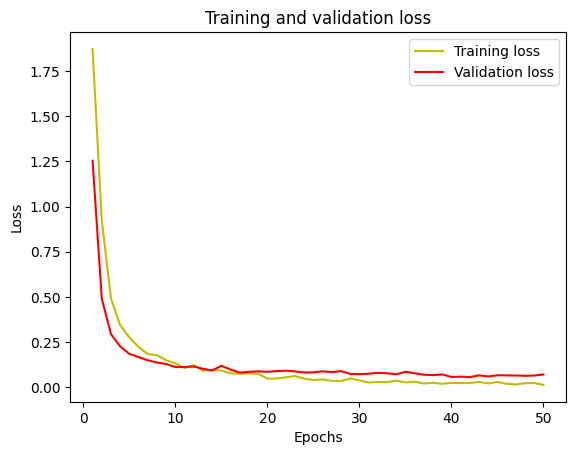

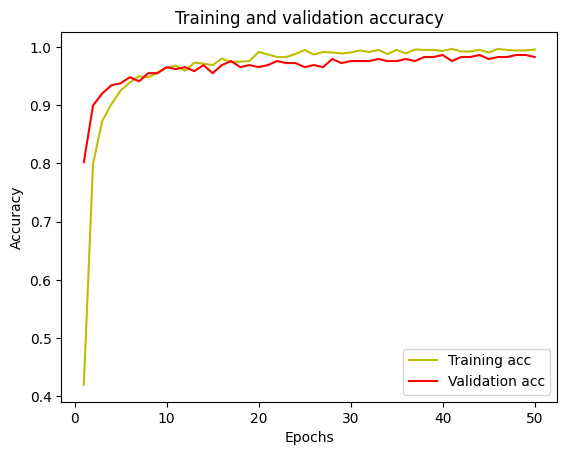

In [18]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.98        29
           4       0.91      0.97      0.94        30
           5       0.95      0.97      0.96        40
           6       1.00      0.98      0.99        44
           7       0.95      0.95      0.95        39
           8       1.00      0.95      0.97        39
           9       0.97      0.93      0.95        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  1  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0